# Dalitz

Let's try to fit some Dalitz data. To start with it's probably simpler to generate a model with `zfit` itself and fit it back.

## Decay

We will fit 

$$
D^0 \to K^0_S \pi^+\pi^-
$$

decays generated with the following intermediate resonances:
- $D^0 \to K^0_S \rho(770)$
- $D^0 \to K^{*-}\pi^+$

### Phasespace
At first, we should be able to generate the correct phase-space. 
In this decay, it is defined by the two invariant mass paramenters 

$$
m^2_{12}= m^2(K^0_S\pi^+)\qquad m^2_{13}= m^2(K^0_S\pi^-)
$$

In [1]:
#Import modules
import zfit
import numpy as np

/Users/maurizio/Software/zfit/lib/python3.10/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [2]:
import os, sys
sys.path.append(f'{os.environ["PWD"]}/utilities')
from dalitz import DalitzKinematics

In [3]:
# Define Observables
mKS = 0.495
mPi = 0.13957
mDz = 1.864
decay = DalitzKinematics(mDz, [mPi,mKS,mPi])
mp = zfit.Space("mp", limits=(decay.mSqMin([0,1]), decay.mSqMax([0,1])))
mn = zfit.Space("mn", limits=(decay.mSqMin([1,2]), decay.mSqMax([1,2])))
mz = zfit.Space("mz", limits=(decay.mSqMin([0,2]), decay.mSqMax([0,2])))

Plot the phase space

In [4]:
import matplotlib.pyplot as plt

/Users/maurizio/Documents/GitRepositories/zfit_exercises/utilities/dalitz.py:127: RuntimeWarning: invalid value encountered in sqrt
  Ymin= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)+ np.sqrt(Est3*Est3-m3Sq),2)
/Users/maurizio/Documents/GitRepositories/zfit_exercises/utilities/dalitz.py:128: RuntimeWarning: invalid value encountered in sqrt
  Ymax= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)- np.sqrt(Est3*Est3-m3Sq),2)


Text(0, 0.5, '$m^2_{K^0_S\\pi^-}$ ($GeV^2/c^4$)')

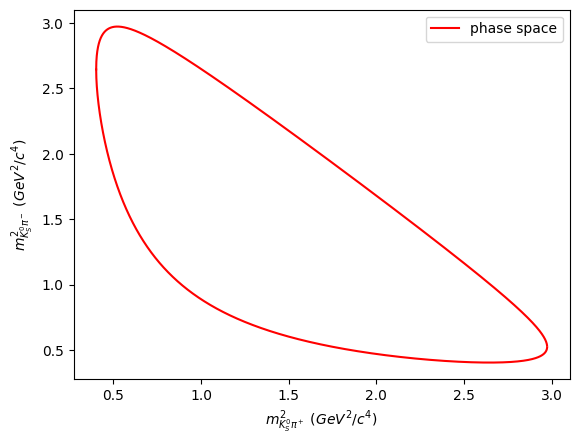

In [5]:
X, Yl, Yh = decay.Contour([0,1],10000)
plt.plot(X,Yl,color='r',label='phase space')
plt.plot(X,Yh,color='r')
plt.legend()
plt.xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
plt.ylabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')

Generate events to fill the phase space

In [6]:
import phasespace
from phasespace import GenParticle

In [7]:
genPip = GenParticle('pi+', mPi)
genPim = GenParticle('pi-', mPi)
genKS  = GenParticle('KS' , mKS)
genDz  = GenParticle('D0' , mDz)
genDz.set_children(genPip,genKS,genPim)
#weights, particles = phasespace.nbody_decay(mDz,[mPi,mKS,mPi]).generate(n_events=1000)
weights, particles = genDz.generate(n_events=1000)

In [8]:
particles

{'pi+': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[-0.05049108, -0.55929777,  0.47131591,  0.74631215],
        [-0.16343999,  0.34906385, -0.03538634,  0.41144888],
        [-0.24104998,  0.21121311, -0.225966  ,  0.41624091],
        ...,
        [-0.15201088, -0.33753721, -0.68108909,  0.78765526],
        [ 0.2267862 , -0.13528978, -0.50373391,  0.58563038],
        [-0.28326001, -0.13103504,  0.50763874,  0.6120321 ]])>,
 'KS': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[ 0.11969114,  0.65490514, -0.40559733,  0.92345054],
        [-0.05774337,  0.20471515,  0.45909187,  0.7078368 ],
        [ 0.18126356,  0.47426066,  0.23064368,  0.74565485],
        ...,
        [ 0.11417712,  0.35285951,  0.34059647,  0.70609999],
        [ 0.05865359,  0.46495978,  0.45130795,  0.81751557],
        [ 0.06933503, -0.33791503, -0.33855259,  0.69183579]])>,
 'pi-': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[-0.06920005, -0.09560737, -0.06571858, 

In [9]:
pPiPi = particles['pi+']+particles['pi-']
pKSPip = particles['pi+']+particles['KS']
pKSPim = particles['pi-']+particles['KS']

In [10]:
import tf_kinematics as tfk

In [11]:
tfk.M(pPiPi).numpy()

array([0.5262104 , 1.03956982, 0.96939142, 0.58052408, 0.59336175,
       1.16332291, 0.84724974, 0.96970362, 0.58624519, 0.89094573,
       1.01662857, 0.60880801, 0.60310829, 0.64897517, 0.59568216,
       0.93606845, 1.19401688, 1.12825924, 1.25871247, 1.14716013,
       1.26464112, 1.29605347, 0.69667793, 0.72942687, 1.27130269,
       0.67829141, 0.61020111, 1.1684634 , 0.46005696, 0.73437915,
       1.04412233, 0.6090844 , 0.65657612, 1.12166774, 0.86435524,
       0.90620525, 0.66083333, 1.07158347, 0.33109476, 1.01559931,
       0.88531488, 0.7477873 , 1.19024523, 0.6683914 , 0.57049436,
       0.56829628, 0.47698689, 1.2429965 , 0.74288488, 0.96233567,
       0.62718915, 0.74372422, 0.76027791, 1.039683  , 0.7719415 ,
       1.33058225, 0.87216276, 0.8854344 , 0.65925023, 0.87132455,
       0.78645357, 0.88615646, 0.30942954, 0.47427445, 1.0627035 ,
       0.39079573, 0.88459971, 0.46383771, 0.80023092, 1.17884132,
       0.64733552, 0.90866238, 1.29852824, 0.6188093 , 0.86406

In [12]:
mSqP = tfk.M2(pKSPip).numpy()
mSqN = tfk.M2(pKSPim).numpy()
mSqZ = tfk.M2(pPiPi).numpy()
mP = tfk.M(pKSPip).numpy()
mN = tfk.M(pKSPim).numpy()
mZ = tfk.M(pPiPi).numpy()

Text(0, 0.5, '$m^2_{K^0_S\\pi^-}$ ($GeV^2/c^4$)')

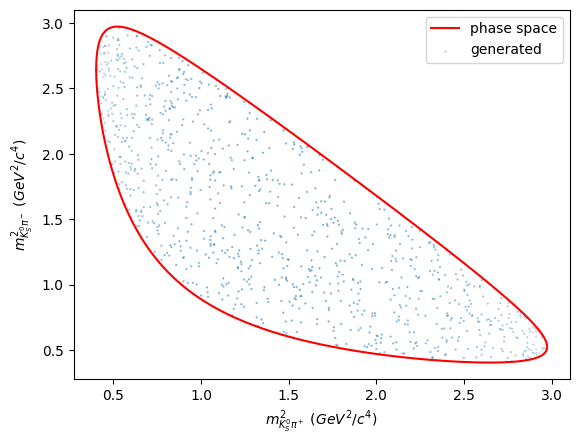

In [13]:
plt.plot(X,Yl,color='r',label='phase space')
plt.plot(X,Yh,color='r')
plt.scatter(mSqP,mSqN,label='generated', s=weights.numpy(), alpha=0.5)
plt.legend()
plt.xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
plt.ylabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')

## Generate Data with a Model
Let's first import a relativistic Breit Wigner PDF from [zfit-physics](https://github.com/zfit/zfit-physics/tree/develop)

In [14]:
import zfit_physics as zphys

/Users/maurizio/Software/zfit/lib/python3.10/site-packages/zfit/core/basemodel.py:199: UserWarning: For the future, also decorate _pdf with @supports and specify what you support (such as 'norm=True' to keep the same behavior as before)
  warnings.warn(


In [15]:
kstmpi= zphys.pdf.RelativisticBreitWigner(m=0.89167, gamma=0.0514, obs=mn )
rhoks = zphys.pdf.RelativisticBreitWigner(m=0.77526, gamma=0.1502, obs=mz )

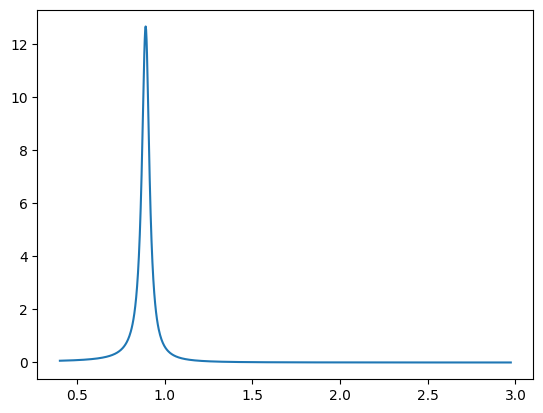

In [16]:
x = np.linspace(mn.limits[0][0][0], mn.limits[1][0][0], 1000)
plt.figure()
y = kstmpi.pdf(x).numpy()
plt.plot(x,y)

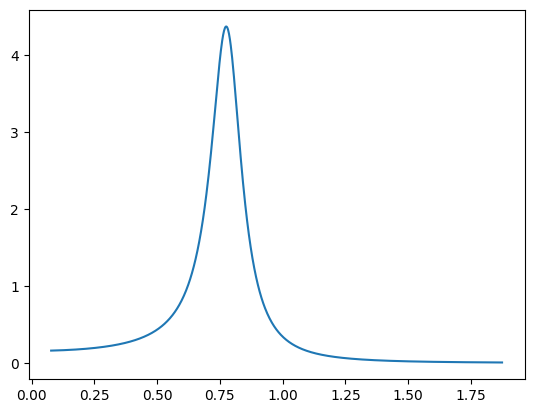

In [17]:
x = np.linspace(mz.limits[0][0][0], mz.limits[1][0][0], 1000)
plt.figure()
y = rhoks.pdf(x).numpy()
plt.plot(x,y)

Create a model:
$$
f(\vec{x}) = f_{NR} + (1-f_{NR})\left(f_{\rho}\text{BW}_{\rho}(\vec{x}) + (1-f_{\rho})\text{BW}_{K^*}(\vec{x})\right)
$$

In [21]:
mn.obs[0]

'mn'

In [27]:
# fractions
#f_NR  = zfit.Parameter("f_NR" , 0.3, 0, 1)
#f_rho = zfit.Parameter("f_rho", 0.6, 0, 1)
# PDFs
kstmpi= zphys.pdf.RelativisticBreitWigner(m=0.89167, gamma=0.0514, obs=mn )  * \
        zfit.pdf.Uniform(low =mp.limits[0][0][0],high=mp.limits[1][0][0], obs=mp)
rhoks = zphys.pdf.RelativisticBreitWigner(m=0.77526, gamma=0.1502, obs=mz )
nr    = zfit.pdf.Uniform(low =mn.limits[0][0][0],high=mn.limits[1][0][0], obs=mn) * \
        zfit.pdf.Uniform(low =mp.limits[0][0][0],high=mp.limits[1][0][0], obs=mp)
# model
model = zfit.pdf.SumPDF([nr, kstmpi], fracs=[f_NR])

In [28]:
x = np.linspace(mn.limits[0][0][0], mn.limits[1][0][0], 1000)
plt.figure()
y = model.pdf(x).numpy()
plt.plot(x,y)

ShapeIncompatibleError: The shape of x (=1000) (in the last dim) does notmatch the shape (=2)of the model

<Figure size 640x480 with 0 Axes>